In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2, style='whitegrid')
%matplotlib inline

In [2]:
df= pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)

### Information about our data

In [5]:
#J is worst, D is best
print(df.color.unique())

#clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
print(df.clarity.unique())

#cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
print(df.cut.unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


## EDA of Dependent Variable and Categorical Features

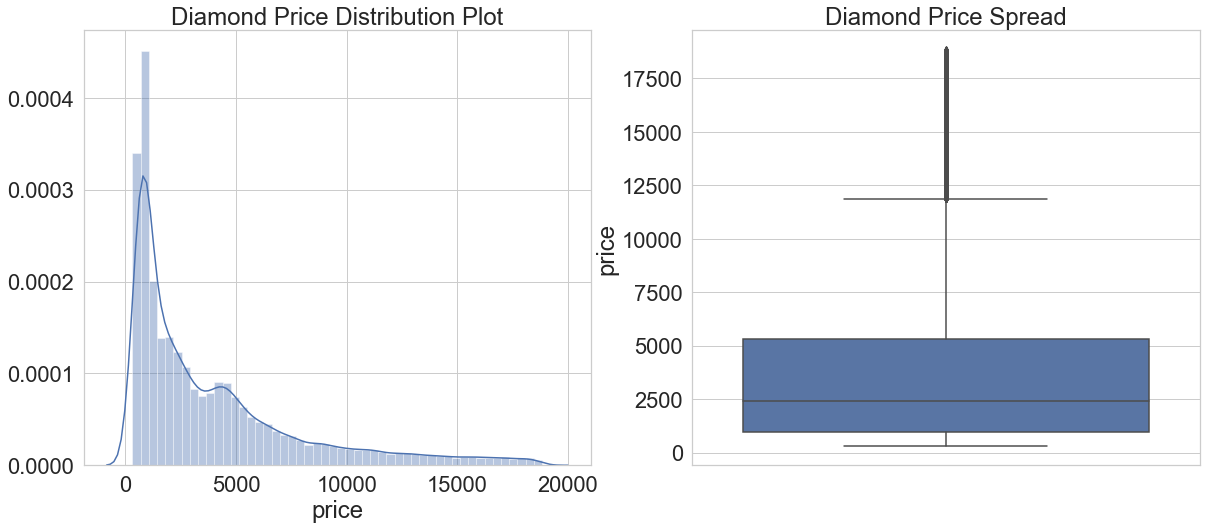

In [6]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Diamond Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Diamond Price Spread')
sns.boxplot(y=df.price)

plt.show()

*Inferences*:
- the price is right skewed
- most of the data is between 1000-5100 USD

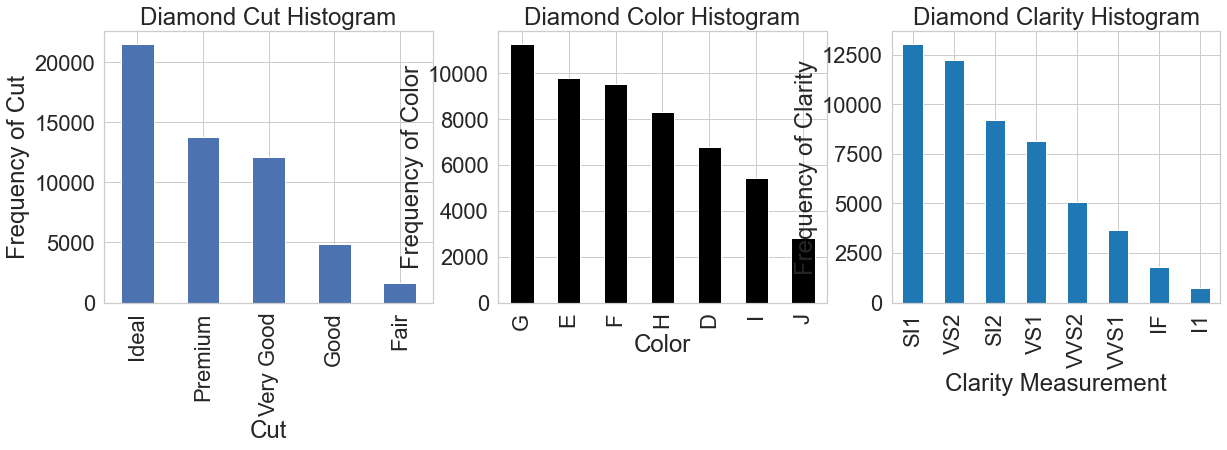

In [7]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt1 = df.cut.value_counts().plot(kind='bar')
plt.title('Diamond Cut Histogram')
plt1.set(xlabel = 'Cut', ylabel='Frequency of Cut')

plt.subplot(1,3,2)
plt1 = df.color.value_counts().plot(kind='bar', color='black')
plt.title('Diamond Color Histogram')
plt1.set(xlabel = 'Color', ylabel='Frequency of Color')


plt.subplot(1,3,3)
plt1 = df.clarity.value_counts().plot(kind='bar', color='tab:blue')
plt.title('Diamond Clarity Histogram')
plt1.set(xlabel = 'Clarity Measurement', ylabel='Frequency of Clarity')


plt.show()

## Plotting Correlation and Dropping Highly Correlated Variables

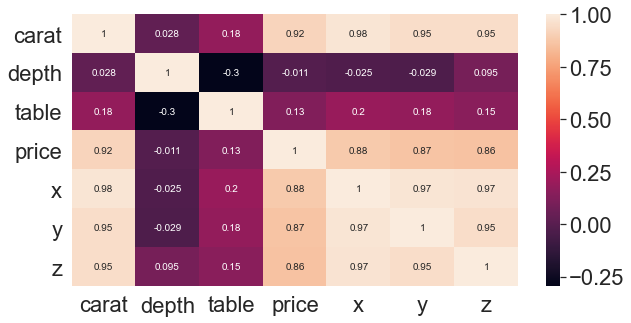

In [8]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

In [9]:
data_pred = df.drop(columns='price')

In [10]:
abs(data_pred.corr()) > 0.75

,carat,depth,table,x,y,z
carat,True,False,False,True,True,True
depth,False,True,False,False,False,False
table,False,False,True,False,False,False
x,True,False,False,True,True,True
y,True,False,False,True,True,True
z,True,False,False,True,True,True


In [11]:
# we drop these columns because their correlation is above .75. We keep the carat variable
df = df.drop(columns=['x','y','z'])

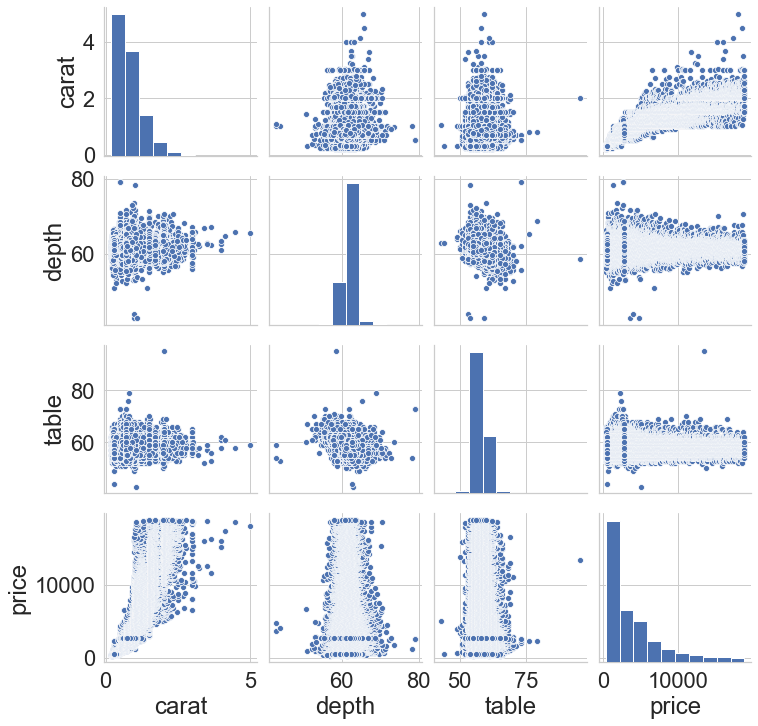

In [12]:
#plot out pairplot to see our variables now

sns.pairplot(df)
plt.show()

## Creating Dummy Variables for Categorical Columns

In [13]:
#create dummy variables for categorical data
cut_dummies = pd.get_dummies(df.cut, prefix='cut', drop_first=True)
color_dummies = pd.get_dummies(df.color, prefix='col', drop_first=True)
clarity_dummies = pd.get_dummies(df.clarity, prefix='clar', drop_first=True)

#now we can drop the columns we originally had
df.drop(['cut','color','clarity'], axis = 1, inplace = True)

In [14]:
#concat dummy df to the main df 
df1 = pd.concat([df, cut_dummies, color_dummies, clarity_dummies], axis=1)

In [15]:
df1.head()

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,col_E,col_F,...,col_H,col_I,col_J,clar_IF,clar_SI1,clar_SI2,clar_VS1,clar_VS2,clar_VVS1,clar_VVS2
0,0.23,61.5,55.0,326,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## Running a Practice/Baseline Model

In [16]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# set x and y variables
X = df1.drop(columns='price')
y = np.log(df1['price'])
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [17]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.047e+06
Date:                Wed, 25 Mar 2020   Prob (F-statistic):                        0.00
Time:                        18:49:32   Log-Likelihood:                         -14327.
No. Observations:               40455   AIC:                                  2.869e+04
Df Residuals:                   40435   BIC:                                  2.887e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat             2.1889      0.004    524.945      0.000       2.181       2.197
depth             0.0482      0.001     76.018      0.000       0.047       0.049
table             0.0371      0.001     54.942      0.000       0.036       0.038
cut_Good          0.1602      0.011     14.003      0.000       0.138       0.183
cut_Ideal         0.3214      0.010     31.366      0.000       0.301       0.341
cut_Premium       0.2164      0.011     20.569      0.000       0.196       0.237
cut_Very Good     0.2190      0.011     20.740      0.000       0.198       0.240
col_E            -0.0509      0.006     -8.059      0.000      -0.063      -0.039
col_F            -0.0452      0.006     -7.075      0.000      -0.058      -0.033
col_G            -0.1239      0.006    -19.841      0.000      -0.136      -0.112
col_H            -0.2616      0.007    -39.352      0.000      -0.275      -0.249
col_I            -0.4201      0.007    -56.229      0.000      -0.435      -0.405
col_J            -0.5855      0.009    -63.664      0.000      -0.604      -0.567
clar_IF           1.1000      0.018     61.718      0.000       1.065       1.135
clar_SI1          0.7839      0.015     51.559      0.000       0.754       0.814
clar_SI2          0.6071      0.015     39.741      0.000       0.577       0.637
clar_VS1          0.9512      0.016     61.340      0.000       0.921       0.982
clar_VS2          0.8840      0.015     57.872      0.000       0.854       0.914
clar_VVS1         1.0151      0.016     61.824      0.000       0.983       1.047
clar_VVS2         0.9967      0.016     62.352      0.000       0.965       1.028
==============================================================================
Omnibus:                    11911.560   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99574.902
Skew:                          -1.181   Prob(JB):                         0.00
Kurtosis:                      10.314   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Practice Predictions vs Train Set
df_test = pd.DataFrame({'Actual': y_train, 'Predicted': predictions}) 
df_test

,Actual,Predicted
36946,6.171701,6.566316
36833,6.863803,7.068592
39060,6.964136,6.593643
39212,6.971669,7.222146
15923,8.759041,8.775312
...,...,...
27640,9.828710,10.339081
14501,8.675393,8.445007
30727,6.605298,6.918357
47323,6.272877,6.886451


In [19]:
y_pred = model.predict(X_test)

In [20]:
# Train vs Actual
df_test2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df_test

,Actual,Predicted
36946,6.171701,6.566316
36833,6.863803,7.068592
39060,6.964136,6.593643
39212,6.971669,7.222146
15923,8.759041,8.775312
...,...,...
27640,9.828710,10.339081
14501,8.675393,8.445007
30727,6.605298,6.918357
47323,6.272877,6.886451


In [21]:
# printing out metrics
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2724528196214374
Mean Squared Error: 0.11936406908742526
Root Mean Squared Error: 0.34549105500349103


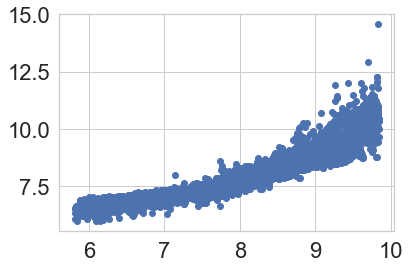

In [22]:
# plotting out how well we did
# looks like we're okay until we get toward the end
plt.scatter(y_test,y_pred)

In [23]:
## GAME PLAN

#Hypothesis testing - based on visuals
#significance btw 1 or 2 carats




## Taking a moment to transform inputs

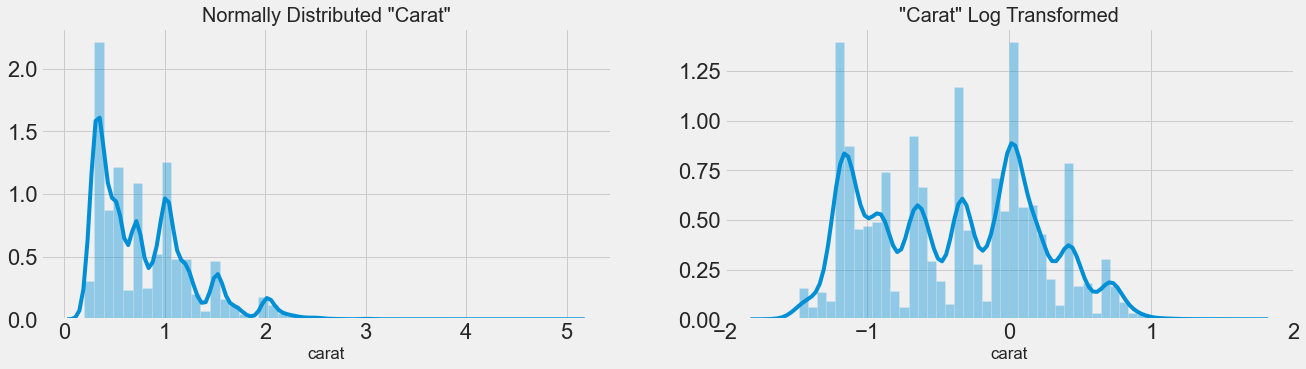

In [24]:
# np log carat because it seemed like an exponential distribution. Now it looks more normal.
import matplotlib.style as style # import to change style

style.use('fivethirtyeight')

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df.carat)
plt.title(fontsize=20, label='Normally Distributed "Carat"')

plt.subplot(1,2,2)
sns.distplot(np.log(df1.carat))
plt.title(fontsize=20, label='"Carat" Log Transformed')

;

#therefore we will keep log transform carat
df1['carat'] = np.log(df1.carat)

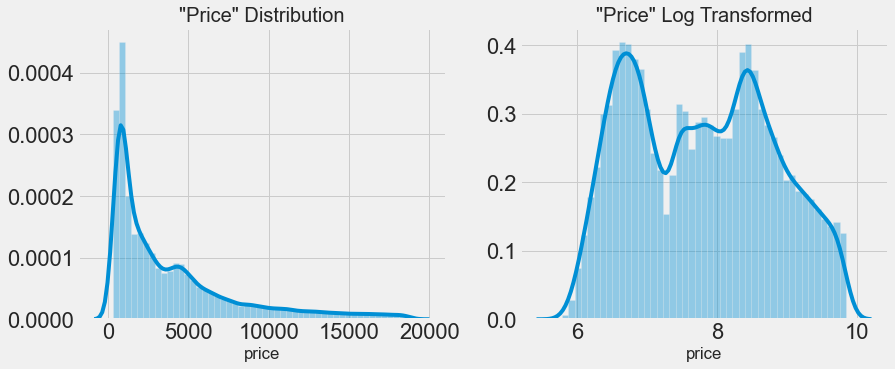

In [25]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.distplot(df1.price)
plt.title(fontsize=20, label='"Price" Distribution');
plt.subplot(1,3,2)
sns.distplot(np.log(df1.price))
plt.title(fontsize=20, label='"Price" Log Transformed')

style.use('fivethirtyeight');

#therefore we will log transform price
df1['price'] = np.log(df1.price)



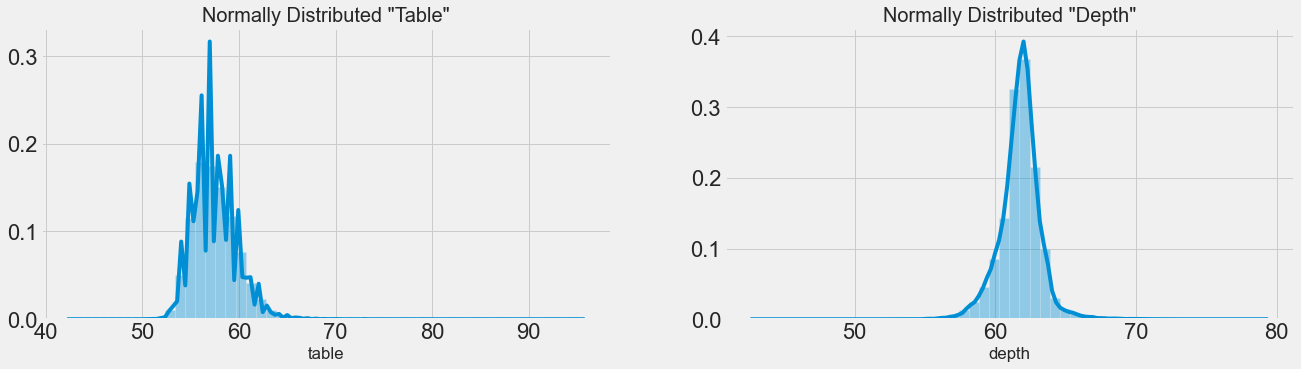

In [26]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df1.table)
plt.title(fontsize=20, label='Normally Distributed "Table"')

plt.subplot(1,2,2)
sns.distplot(df1.depth)
plt.title(fontsize=20, label='Normally Distributed "Depth"');

## Running model with log transformed Variables

In [29]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# set x and y variables
X = df1.drop(columns='price')
y = df1['price']
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.284e+06
Date:                Wed, 25 Mar 2020   Prob (F-statistic):                        0.00
Time:                        18:50:16   Log-Likelihood:                          14144.
No. Observations:               40455   AIC:                                 -2.825e+04
Df Residuals:                   40435   BIC:                                 -2.808e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat             1.8698      0.002   1118.354      0.000       1.867       1.873
depth             0.0762      0.000    242.283      0.000       0.076       0.077
table             0.0478      0.000    143.277      0.000       0.047       0.048
cut_Good          0.2498      0.006     44.124      0.000       0.239       0.261
cut_Ideal         0.5065      0.005     99.738      0.000       0.497       0.516
cut_Premium       0.3904      0.005     74.942      0.000       0.380       0.401
cut_Very Good     0.3620      0.005     69.239      0.000       0.352       0.372
col_E            -0.0422      0.003    -13.506      0.000      -0.048      -0.036
col_F            -0.0796      0.003    -25.160      0.000      -0.086      -0.073
col_G            -0.1514      0.003    -48.999      0.000      -0.157      -0.145
col_H            -0.2454      0.003    -74.767      0.000      -0.252      -0.239
col_I            -0.3705      0.004   -100.716      0.000      -0.378      -0.363
col_J            -0.5098      0.005   -112.691      0.000      -0.519      -0.501
clar_IF           1.2572      0.009    142.403      0.000       1.240       1.274
clar_SI1          0.7069      0.008     94.104      0.000       0.692       0.722
clar_SI2          0.5496      0.008     72.744      0.000       0.535       0.564
clar_VS1          0.9375      0.008    122.326      0.000       0.922       0.952
clar_VS2          0.8622      0.008    114.198      0.000       0.847       0.877
clar_VVS1         1.1458      0.008    140.919      0.000       1.130       1.162
clar_VVS2         1.0726      0.008    135.617      0.000       1.057       1.088
==============================================================================
Omnibus:                     4614.768   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25409.747
Skew:                           0.417   Prob(JB):                         0.00
Kurtosis:                       6.792   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Forming Hypothesis Testing
Alternative Hypothesis : mu1 != m2 <br>
Null Hypothesis : mu1 == m2    <br>
mu1 = average price of logged 1 carat diamonds<br>
mu2 = average price of logged 2 carat diamonds

In [28]:
#no features cheating - data leakage